In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

In [2]:
np.random.random(4).round(2)

array([0.46, 0.22, 0.59, 0.26])

In [3]:
df = pd.read_csv("datasets/mall-customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df.iloc[:, [3, 4]].values

In [6]:
from sklearn.cluster import DBSCAN

<Axes: >

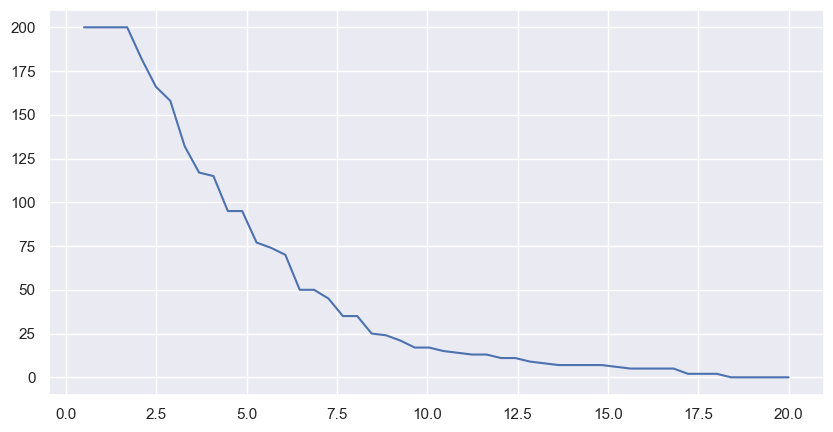

In [7]:
noise_percent = []
for i in np.linspace(0.5, 20, 50):
    model = DBSCAN(i)
    model.fit(X)
    noice = sum(model.fit_predict(X) == -1)
    noise_percent.append(noice)
plt.figure(figsize=(10, 5))
sns.lineplot(x=np.linspace(0.5, 20, 50), y=noise_percent)

In [8]:
model = DBSCAN(eps=10, min_samples=4)

In [9]:
model.fit(X)

DBSCAN(eps=10, min_samples=4)

In [10]:
y = model.fit_predict(X)
y

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  2,  1,  2,  1,  0,  1,  2,  1,
        2,  1,  2,  1,  2,  1,  0,  1,  2,  1,  0,  1,  2,  1,  2,  1,  2,
        1,  2,  1,  2,  1,  2,  1,  0,  1,  2,  1,  2,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1, -1,  1,  2,
       -1,  2,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<Axes: >

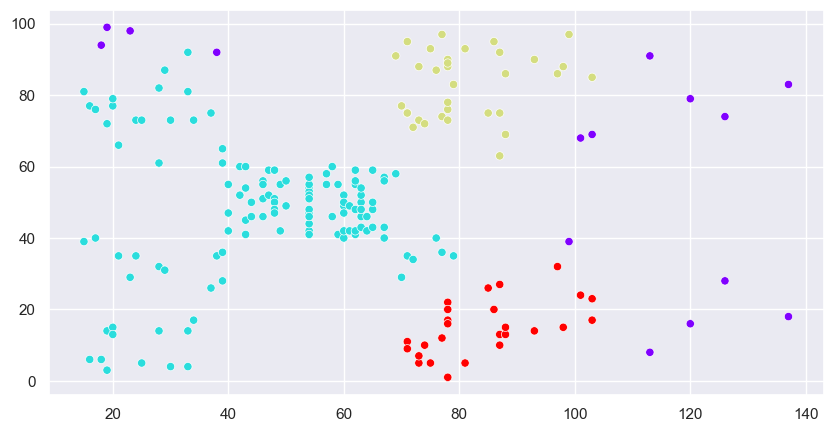

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=y, cmap="rainbow")
# px.scatter(X[:, 0], X[:, 1], color=y )

In [12]:
df["y"] = y

In [13]:
outliers = df[df["y"] == -1]

In [14]:
outliers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y
7,8,Female,23,18,94,-1
11,12,Female,35,19,99,-1
19,20,Female,35,23,98,-1
41,42,Male,24,38,92,-1
184,185,Female,41,99,39,-1
187,188,Male,28,101,68,-1
191,192,Female,32,103,69,-1
192,193,Male,33,113,8,-1
193,194,Female,38,113,91,-1
194,195,Female,47,120,16,-1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

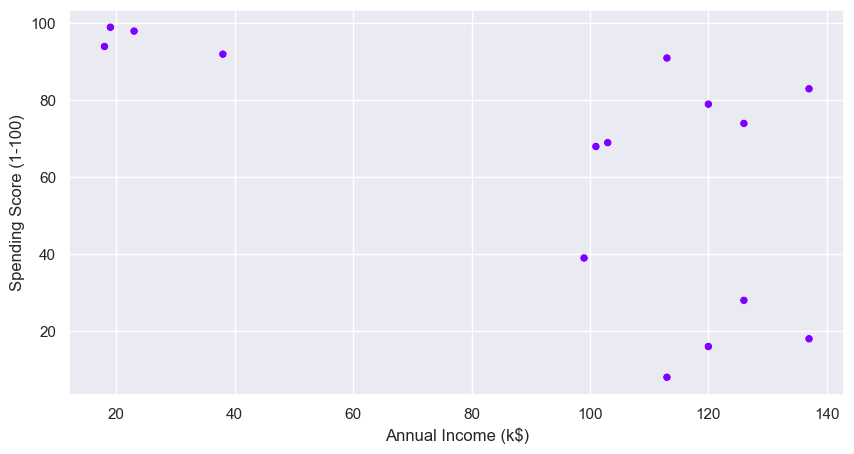

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=outliers["Annual Income (k$)"],
    y=outliers["Spending Score (1-100)"],
    c=outliers["y"],
    cmap="rainbow",
)
# px.scatter(X[:, 0], X[:, 1], color=y )

In [16]:
df = df[df["y"] != -1]

In [17]:
from sklearn.cluster import KMeans

In [18]:
X = df.iloc[:, [3, 4]].values

Text(0.5, 1.0, 'Explore Data')

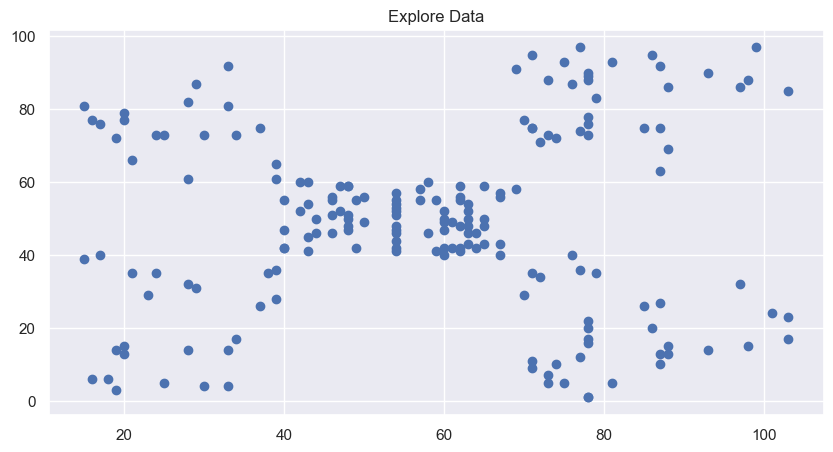

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Explore Data")
# plt.style.use('background-dark')

C:\Users\TECHNO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TECHNO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TECHNO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

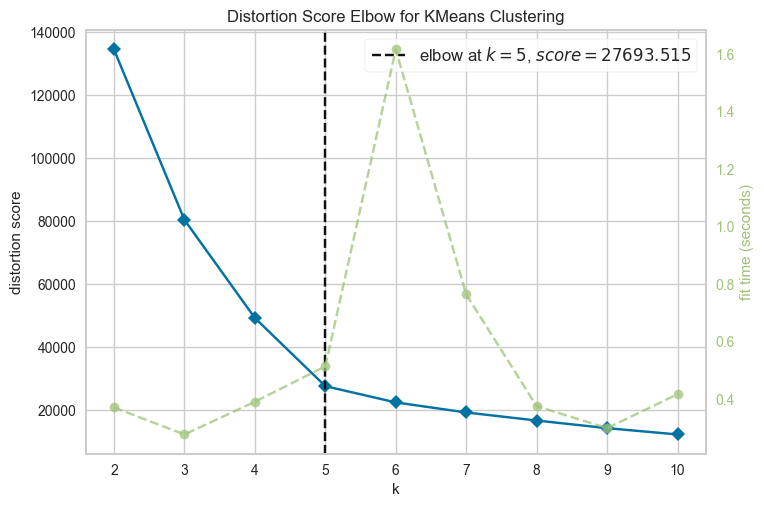

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# wcss = []
# for i in range(1, 11):
#     model = KMeans(n_clusters=i)
#     model.fit(X)
#     wcss.append(model.inertia_)
# wcss
from yellowbrick.cluster import kelbow_visualizer
vis = kelbow_visualizer(model=KMeans(n_clusters=5, init="k-means++", random_state=42), k=10,X=X)
vis.show()

In [ ]:
model = KMeans(n_clusters=5, init="k-means++", random_state=42)

In [ ]:
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
y_predict = model.fit_predict(X)

In [ ]:
y_predict

array([4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 2, 4, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
df["y_predict"] = y_predict

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'y', 'y_predict'],
      dtype='object')

In [ ]:
df["clusters"] = df["y_predict"].map(
    {
        0: "High Income High Spending",
        1: "Low Income High Spending",
        2: "average income average Spending",
        3: "High Income Low spending",
        4: "low income low spending",
    }
)

In [ ]:
plt.figure(figsize=(10, 5))
px.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    color=df["clusters"],
    width=600,
    title="Clusters",
)

<Figure size 720x360 with 0 Axes>